<a href="https://colab.research.google.com/github/BrunoDkno368/Riesgo-Crediticio/blob/main/Copia_de_Untitled19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANALISIS DE RIESGO CREDITICIO

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## ETL

### EXTRAT (E)

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Banco Riesgo Crediticio/credit_risk_dataset.csv")

In [ ]:
# verificamos que quedo cargado el df
df.sample(4)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
4859,23,36100,RENT,2.0,EDUCATION,A,5000,7.49,0,0.14,N,4
30665,36,54000,MORTGAGE,1.0,MEDICAL,E,10000,14.93,1,0.19,Y,11
32336,52,85000,RENT,5.0,MEDICAL,A,1000,8.90,0,0.01,N,28
30042,36,26000,RENT,NaN,DEBTCONSOLIDATION,B,8500,10.62,1,0.33,N,14


### TRANSFORM (T)

In [ ]:
print('El df tiene', df.shape[1], 'columnas y', df.shape[0], 'filas')

El df tiene 12 columnas y 32581 filas


In [ ]:
# renombramos columnas

In [ ]:
df.rename(columns={'person_age':"Edad", 'person_income': 'Ingreso',
                   'person_home_ownership': 'Vivienda', 'person_emp_length':'Antiguedad (trabajo)',
                   'loan_intent':'Intencion del prestamo', 'loan_grade':'Calificacion del prestamo',
                   'loan_amnt':'Monto del presamo', 'loan_int_rate':'Tasa de interes', 'loan_status':'Estado del prestamo',
                   'loan_percent_income': 'Porcentaje de ingresos', 'cb_person_default_on_file':'Predeterminado historico',
                   'cb_person_cred_hist_length':'Antigüedad del historial crediticio' }, inplace=True)

In [ ]:
# informacion del df
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Edad                                 32581 non-null  int64  
 1   Ingreso                              32581 non-null  int64  
 2   Vivienda                             32581 non-null  object 
 3   Antiguedad (trabajo)                 31686 non-null  float64
 4   Intencion del prestamo               32581 non-null  object 
 5   Calificacion del prestamo            32581 non-null  object 
 6   Monto del presamo                    32581 non-null  int64  
 7   Tasa de interes                      29465 non-null  float64
 8   Estado del prestamo                  32581 non-null  int64  
 9   Porcentaje de ingresos               32581 non-null  float64
 10  Predeterminado historico             32581 non-null  object 
 11  Antigüedad del historial cre

In [ ]:
# Verificamos la cantidad de duplicados
df.duplicated().sum()

np.int64(165)

In [ ]:
# Eliminamos los duplicados
df.drop_duplicates(inplace=True)

In [ ]:
# Confirmamos que ya no tiene
df.duplicated().sum()

np.int64(0)

In [ ]:
# Verificamos la cantidad de nulos
df.isna().sum()

,0
Edad,0
Ingreso,0
Vivienda,0
Antiguedad (trabajo),887
Intencion del prestamo,0
Calificacion del prestamo,0
Monto del presamo,0
Tasa de interes,3095
Estado del prestamo,0
Porcentaje de ingresos,0


In [ ]:
# Porcentaje de nulos
porcentaje_nulos= (df.isna().sum()/len(df)*100).round()
print(porcentaje_nulos)


Edad                                    0.0
Ingreso                                 0.0
Vivienda                                0.0
Antiguedad (trabajo)                    3.0
Intencion del prestamo                  0.0
Calificacion del prestamo               0.0
Monto del presamo                       0.0
Tasa de interes                        10.0
Estado del prestamo                     0.0
Porcentaje de ingresos                  0.0
Predeterminado historico                0.0
Antigüedad del historial crediticio     0.0
dtype: float64


In [ ]:
df.dropna(inplace=True)

In [ ]:
# Confirmamos que ya no quedan nulos
df.isna().sum()

,0
Edad,0
Ingreso,0
Vivienda,0
Antiguedad (trabajo),0
Intencion del prestamo,0
Calificacion del prestamo,0
Monto del presamo,0
Tasa de interes,0
Estado del prestamo,0
Porcentaje de ingresos,0


In [ ]:
df['Edad'].describe()

,Edad
count,28501.000000
mean,27.738676
std,6.316166
min,20.000000
25%,23.000000
50%,26.000000
75%,30.000000
max,144.000000


<Axes: xlabel='Edad', ylabel='None'>

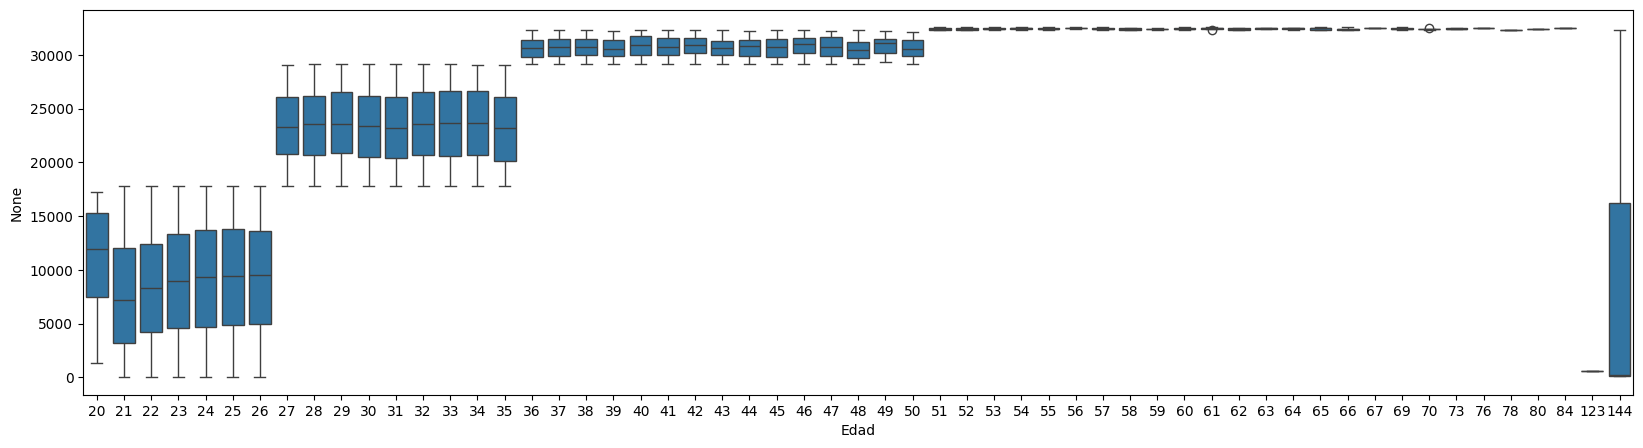

In [ ]:
# Veridicamos que en edad tiene una persona 144 años seguramene es un dato mal cargado
plt.figure(figsize=(20,5))
sns.boxplot(x=df['Edad'], y=df.index)

In [ ]:
#Vemos que posee edades de 123 y 144 años, procedemos a configurar un rango de edad
df = df[df['Edad'] < 85]
df['Edad'].max()
#Confirmamos que la maxima edad es de 84 años dentro de df

84

<Axes: xlabel='Antiguedad (trabajo)', ylabel='None'>

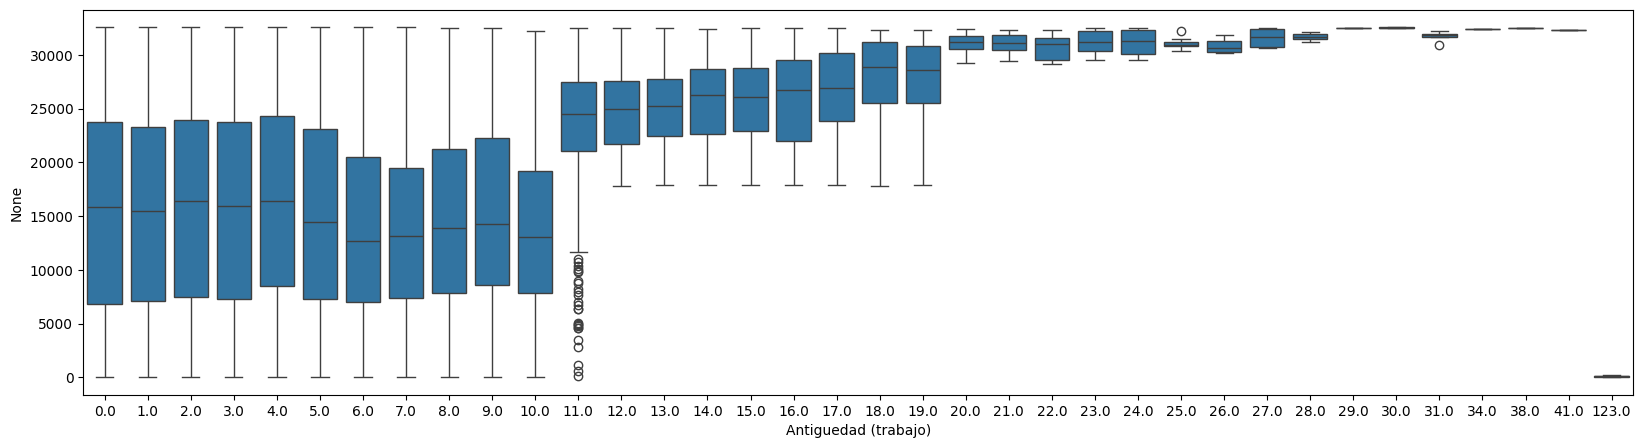

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(x=df['Antiguedad (trabajo)'], y= df.index)

In [ ]:
#Verificamos que hay una persona que tiene 123 años en el trabajo
df = df[df['Antiguedad (trabajo)'] < 100]
df['Antiguedad (trabajo)'].max()
# Confirmamos que eliminamos ese outlier

41.0

In [ ]:
df.describe()

,Edad,Ingreso,Antiguedad (trabajo),Monto del presamo,Tasa de interes,Estado del prestamo,Porcentaje de ingresos,Antigüedad del historial crediticio
count,28495.000000,2.849500e+04,28495.000000,28495.000000,28495.000000,28495.000000,28495.000000,28495.000000
mean,27.723530,6.643047e+04,4.781751,9657.366205,11.045220,0.217126,0.169517,5.800316
std,6.177199,5.151374e+04,4.037958,6327.711290,3.230786,0.412296,0.106379,4.040800
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.948000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.600000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,84.000000,2.039784e+06,41.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


### LOAD (L)

In [ ]:
df.to_csv('credit_risk_dataset_limpio.csv', index=False)

## EDA

GRAFICOS

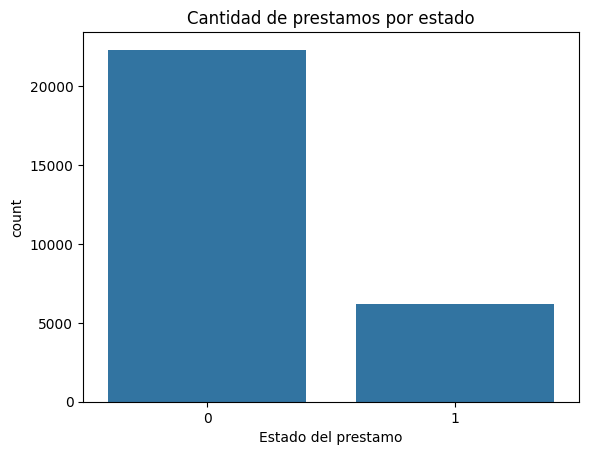

In [ ]:
sns.countplot(x=df['Estado del prestamo'], data=df)
plt.title('Cantidad de prestamos por estado')
plt.show( )

In [ ]:
df.columns

Index(['Edad', 'Ingreso', 'Vivienda', 'Antiguedad (trabajo)',
       'Intencion del prestamo', 'Calificacion del prestamo',
       'Monto del presamo', 'Tasa de interes', 'Estado del prestamo',
       'Porcentaje de ingresos', 'Predeterminado historico',
       'Antigüedad del historial crediticio'],
      dtype='object')

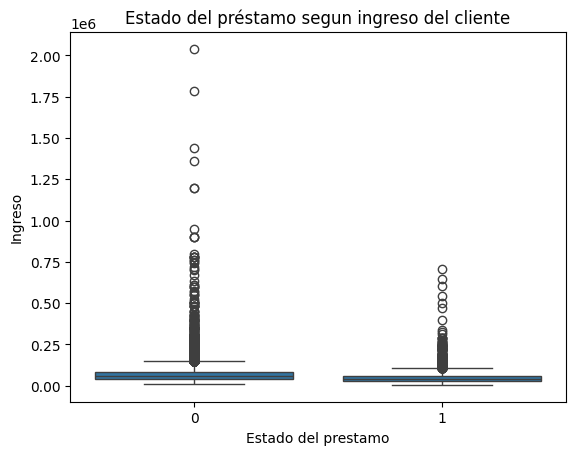

In [ ]:
# 0 = al dia, 1= impago
sns.boxplot(x="Estado del prestamo", y="Ingreso", data=df)
plt.title("Estado del préstamo segun ingreso del cliente")
plt.show()

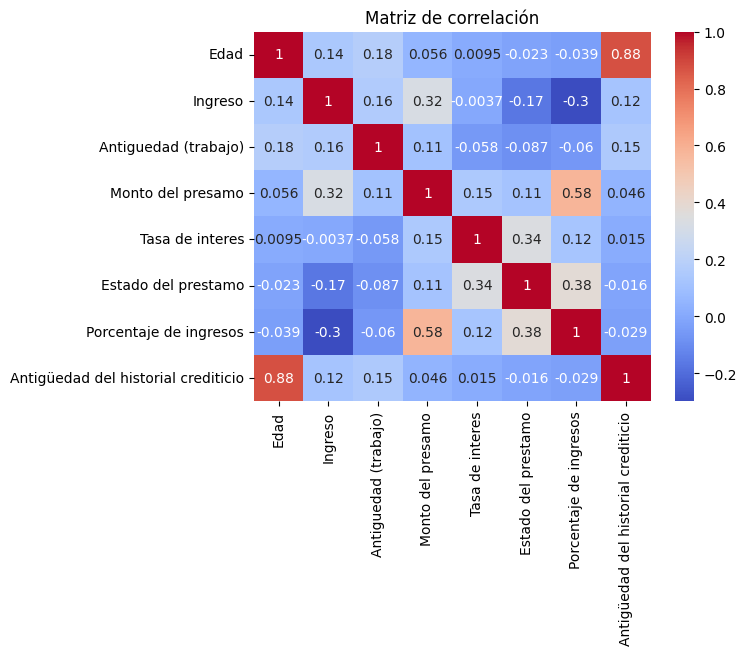

In [ ]:
# Matriz de coorrelacion
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot= True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

Text(0.5, 1.0, 'Distribución de ingresos')

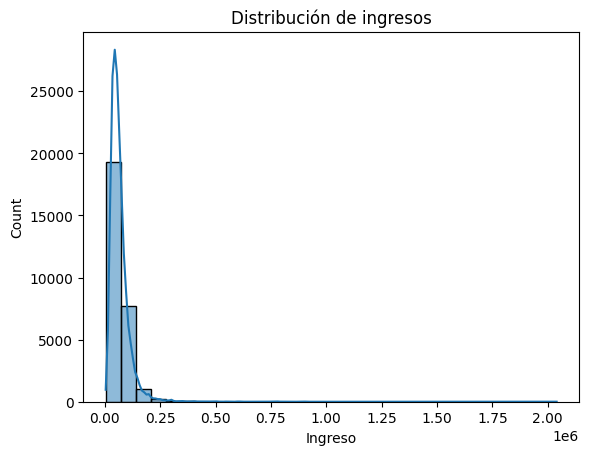

In [ ]:
# Distribucion de ingresos
sns.histplot(df['Ingreso'], bins=30, kde=True)
plt.title('Distribución de ingresos')

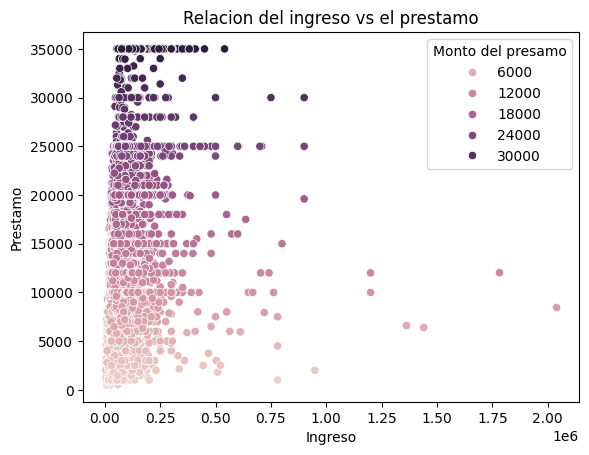

In [ ]:
# relacion del ingreso vs el prestamo
sns.scatterplot(x='Ingreso', y='Monto del presamo', hue='Monto del presamo', data=df)
plt.title('Relacion del ingreso vs el prestamo')
plt.xlabel('Ingreso')
plt.ylabel('Prestamo')
plt.show()

<Axes: xlabel='Estado del prestamo', ylabel='Antiguedad (trabajo)'>

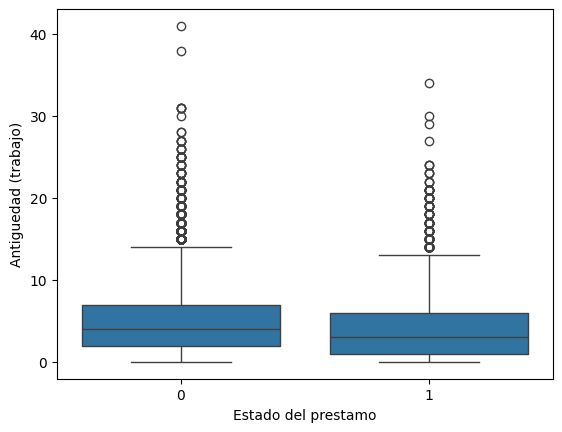

In [ ]:
# Estado del prestamos en relacion a la antiguedad
sns.boxplot(x='Estado del prestamo', y='Antiguedad (trabajo)', data=df)